There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course ai first if you want to take course bi.

    For example, the pair [0, 1] indicates that you have to take course 0 before you can take course 1.

Prerequisites can also be indirect. If course a is a prerequisite of course b, and course b is a prerequisite of course c, then course a is a prerequisite of course c.

You are also given an array queries where queries[j] = [uj, vj]. For the jth query, you should answer whether course uj is a prerequisite of course vj or not.

Return a boolean array answer, where answer[j] is the answer to the jth query.

 

Example 1:

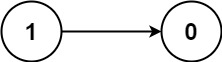

Input: numCourses = 2, prerequisites = [[1,0]], queries = [[0,1],[1,0]]
Output: [false,true]
Explanation: The pair [1, 0] indicates that you have to take course 1 before you can take course 0.
Course 0 is not a prerequisite of course 1, but the opposite is true.

Example 2:

Input: numCourses = 2, prerequisites = [], queries = [[1,0],[0,1]]
Output: [false,false]
Explanation: There are no prerequisites, and each course is independent.

Example 3:

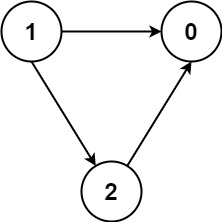

Input: numCourses = 3, prerequisites = [[1,2],[1,0],[2,0]], queries = [[1,0],[1,2]]
Output: [true,true]

 

Constraints:

    2 <= numCourses <= 100
    0 <= prerequisites.length <= (numCourses * (numCourses - 1) / 2)
    prerequisites[i].length == 2
    0 <= ai, bi <= numCourses - 1
    ai != bi
    All the pairs [ai, bi] are unique.
    The prerequisites graph has no cycles.
    1 <= queries.length <= 104
    0 <= ui, vi <= numCourses - 1
    ui != vi



In [ ]:
class Solution:
    def checkIfPrerequisite(self, numCourses: int, prerequisites: List[List[int]], queries: List[List[int]]) -> List[bool]:
        is_prerequisite = [[-1 for _ in range(numCourses)] for _ in range(numCourses)]
        adj_list = defaultdict(list)
        for i, j in prerequisites:
            adj_list[i].append(j)
        ans = []
        for start, end in queries:
            if is_prerequisite[start][end] == -1:
                is_prerequisite[start] = [False for _ in range(numCourses)]
                q = deque([start])
                while q:
                    node = q.popleft()
                    if is_prerequisite[start][node]:
                        continue
                    is_prerequisite[start][node] = True
                    for nxt in adj_list[node]:
                        q.append(nxt)
            ans.append(is_prerequisite[start][end])
        return ans